In [2]:
!pip install kerykeion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 

In [15]:
from kerykeion import AstrologicalSubject
import numpy as np
import matplotlib.pyplot as ply
from datetime import datetime, timedelta
from scipy.stats import entropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/OFFICIAL_DF_HOUSE.csv')

In [7]:
df = data.drop(['Month', 'Day', 'Year', 'Hour', 'Minute', 'Time'], axis = 1)
df

,Sun House,Moon House,Mercury House,Venus House,Mars House,Jupiter House,Saturn House,Uranus House,Neptune House
0,2,3,2,2,12,3,10,12,7
1,5,6,6,5,3,6,1,3,10
2,8,9,8,7,6,8,4,6,1
3,1,2,2,1,11,2,9,11,6
4,11,12,11,10,8,11,7,8,3
...,...,...,...,...,...,...,...,...,...
29995,12,8,1,2,2,5,3,11,10
29996,5,1,6,7,7,10,8,4,3
29997,11,7,12,1,1,4,2,10,9
29998,3,10,3,4,4,7,5,1,1


In [9]:
df = df.rename(columns={'Sun House': 'Sun', 'Moon House': 'Moon', 'Mercury House': 'Mercury',
                        'Venus House': 'Venus', 'Mars House': 'Mars', 'Jupiter House': 'Jupiter',
                        'Saturn House':'Saturn', 'Uranus House':'Uranus', 'Neptune House':'Neptune'})
df

,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune
0,2,3,2,2,12,3,10,12,7
1,5,6,6,5,3,6,1,3,10
2,8,9,8,7,6,8,4,6,1
3,1,2,2,1,11,2,9,11,6
4,11,12,11,10,8,11,7,8,3
...,...,...,...,...,...,...,...,...,...
29995,12,8,1,2,2,5,3,11,10
29996,5,1,6,7,7,10,8,4,3
29997,11,7,12,1,1,4,2,10,9
29998,3,10,3,4,4,7,5,1,1


The formula I used:

$I(X,Y) = \sum_{y \in Y} \sum_{x \in X} P_{(X,Y)}(x, y) \; log \left( \frac{P_{(X,Y)}(x, y)}{P_X(x)P_Y(y)}\right) $

In [8]:
def mutualInfo(itemX, itemY):
  I = 0.0
  size = len(df)
  for x in range(0,12):
    for y in range(0,12):
      pxy = len(df[df[itemX]==x][df[itemY]==y])/size
      px = len(df[df[itemX]==x])/size
      py = len(df[df[itemY]==y])/size
      #if pxy is 0, log(0) gives -infn which causes the I to become nan
      if(pxy != 0):
        I += pxy*np.log2(pxy/(px*py))
  return I

In [10]:
items = ['Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

In [11]:
mi_dict = {}
for x in items:
  mi = []
  for y in items:
    mi.append(mutualInfo(x,y))
  mi_dict[x] = mi

In [12]:
mi_df = pd.DataFrame(mi_dict, index = items)

In [13]:
mi_df

,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune
Sun,3.289689,0.005410,1.865928,1.205226,0.131214,0.014337,0.004469,0.006000,0.004643
Moon,0.005410,3.284408,0.005139,0.006010,0.002953,0.004583,0.004087,0.004301,0.003667
Mercury,1.865928,0.005139,3.294062,1.058733,0.122581,0.020491,0.010756,0.007335,0.009362
Venus,1.205226,0.006010,1.058733,3.281371,0.104280,0.016220,0.016482,0.012304,0.014895
Mars,0.131214,0.002953,0.122581,0.104280,3.292082,0.029221,0.033714,0.011462,0.026671
Jupiter,0.014337,0.004583,0.020491,0.016220,0.029221,3.288863,0.233471,0.134050,0.087061
Saturn,0.004469,0.004087,0.010756,0.016482,0.033714,0.233471,3.279030,0.107722,0.085131
Uranus,0.006000,0.004301,0.007335,0.012304,0.011462,0.134050,0.107722,3.289633,0.162903
Neptune,0.004643,0.003667,0.009362,0.014895,0.026671,0.087061,0.085131,0.162903,3.286848


<Axes: >

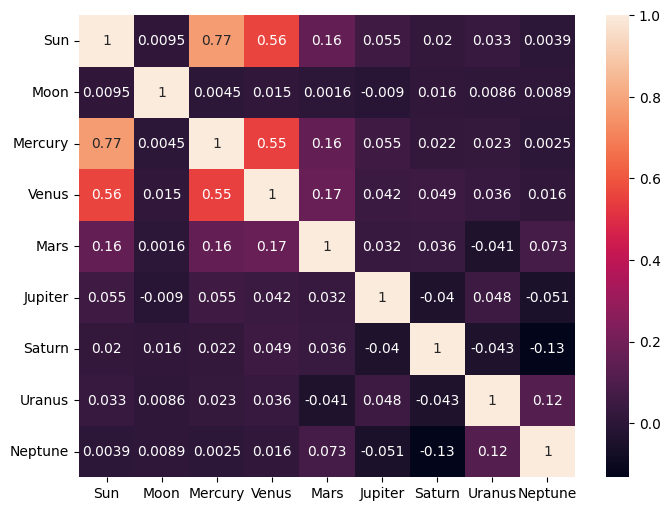

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)